# About
Some plots of a Frechet Distribution.

Context:
* Under power laws the **sample maximum follows a Frechet distribution**.
* The tail exponent of sample maximum is the same as that of the underlying distribution.
* In this notebook I don't plot the PDF. I plot the Survival function instead.
* The survival function is interesting because the slope of its tail on a log-log scale is equal to the tail exponent.
* You can find more details in the Technical Incerto, Volume 1, Chapter 9

In [1]:
from math import e

import numpy as np
import pandas as pd

# Simple Example

In [2]:
alpha = 2 # Tail parameter

### Generate Data

In [3]:
# Frechet Survival Probability Function
survival_fn = lambda x, alpha: 1 - e**(-x**-alpha)  # P(X>x)

In [4]:
# Generate Data
x = np.linspace(0.1, 10, 100)  # 100 equally spaced x locations

y = survival_fn(x, alpha)

df = pd.DataFrame(y, index=x, columns=['survival_probability'])
df.index.name = 'value'

df

,survival_probability
value,
0.1,1.000000
0.2,1.000000
0.3,0.999985
0.4,0.998070
0.5,0.981684
...,...
9.6,0.010792
9.7,0.010572
9.8,0.010358


### Plot the survival function:

So we have survival probabilities for a Frechet Distribution with tail parameter: alpha=2. This means the slope on a loglog scale should be -2. Lets plot this to verify our expectations:

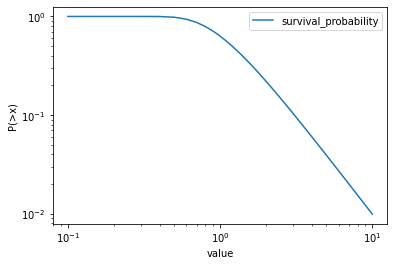

In [5]:
df.plot(loglog=True, ylabel='P(>x)');

# Compare Alpha values

Lets repeat the above example for three different tail exponents. Alpha = 1, 2 and 3. Smaller tail exponents correspond to fatter tails.

### Generate Data

In [6]:
alpha_values = [1, 2, 3]

In [7]:
d = {f'alpha_{alpha}': survival_fn(x, alpha) for alpha in alpha_values}

In [8]:
df = pd.DataFrame(d, index=x)
df.index.name = 'value'

df

,alpha_1,alpha_2,alpha_3
value,,,
0.1,0.999955,1.000000,1.000000
0.2,0.993262,1.000000,1.000000
0.3,0.964326,0.999985,1.000000
0.4,0.917915,0.998070,1.000000
0.5,0.864665,0.981684,0.999665
...,...,...,...
9.6,0.098925,0.010792,0.001130
9.7,0.097957,0.010572,0.001095
9.8,0.097007,0.010358,0.001062


##### Plot

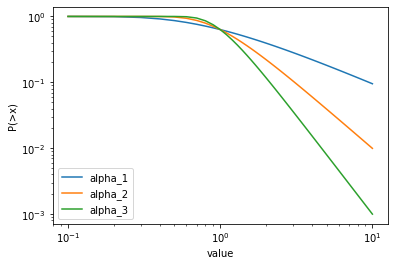

In [9]:
df.plot(loglog=True, ylabel='P(>x)');

Finally lets plot survival probability on a standard scale. 

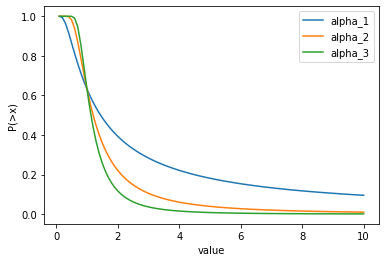

In [10]:
df.plot(ylabel='P(>x)');